In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

## Time Normalisation in Graphical Kinetic Analysis

Important kinetic information can be easily extracted visually using reaction monitoring. By repeating the same reaction multiple times and altering specific starting conditions, NMR data collected can be used for the calculation of the order of the reactants and catalyst used, as well as for determining whether there is degradation of the catalyst during the process. In this notebook, I will use a Suzuki-Miyaura reaction to showcase this method.

### The reaction component "excess" - Probing catalyst degradation

<div>
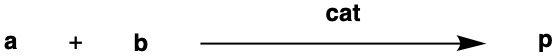
</div>

In the model reaction above, **a** and **b** react together in a 1:1 stoichiometry - this meaning that if both reactants had starting concentrations of 1 M, they would react to completion leaving 1 M of product **p**. The **excess** of the reactant components is simply the concentration of one reactant greater than the other in the starting mixture - e.g. if [**a**]$_0$ = 1.0 M and [**b**]$_0$ = 1.3 M, the reactant excess of [**b**] over [**a**] is 0.3 M and thus 0.3 M of [**b**] would remain in the reaction mixture.

Extending the previous example, if in a different experiment [**a**]$_0$ = 1.6 M and [**b**]$_0$ = 1.9 M, the reactant excess of [**b**] over [**a**] is again 0.3 M, yet this time the reaction has a different starting point. Provided the [**catalyst**] is the same in both experiments, plotting the concentration of one of the reactants versus time allows the degradation of the catalyst within the catalytic cycle to be probed.

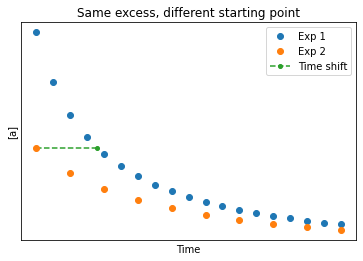

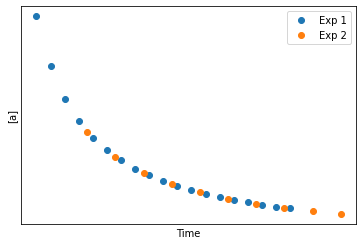

In [2]:
from graph_examples import ex_no_cat_degrad, ex_cat_degrad

ex_no_cat_degrad()

In a catalytic cycle where catalyst degradation is not occurring, Exp 2 can be thought of as a fast forward operation of Exp 1 whereby the same experiment has been run but from a different starting point. When "time shifting" Exp 2, we see an overlay of the two [**a**] vs t curves meaning the catalyst is performing exactly the same despite the extra number of catalytic cycles completed.

The other possibility is that there isn't an overlay of the curves, as shown below.

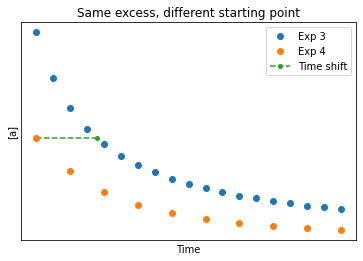

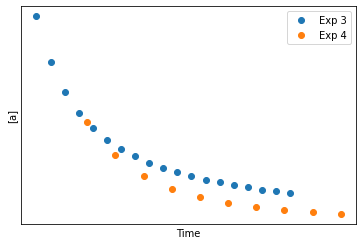

In [3]:
ex_cat_degrad()

In this example, the catalyst is working more effectively at the start of the reaction in comparison to after a number of catalytic cycles. This can be seen in Exp 3 through a smaller $-\frac{d[a]}{dt}$ after reaching the [**a**]$_0$ of Exp 4. This would likely be due to:
- Product inhibition where the product can bind to the active site of the catalyst, preventing the reactants from binding and therefore reducing the rate of catalysis
- One of the many [mechanisms of catalyst deactivation](https://www.sciencedirect.com/science/article/pii/S0926860X00008437)$^{[1]}$

### Visual Overlay Strategy

#### Catalyst order determination

Besides probing catalyst degradation, the order in each of the reactants and catalyst can be determined using a similar strategy. For catalyst order determination, this requires two experiments with the same starting conditions but a different concentration of catalyst. For example:
- [**a**$_1$]$_0$ = [**a**$_2$]$_0$
- [**b**$_1$]$_0$ = [**b**$_2$]$_0$
- [**cat**$_1$]$_0$ ≠ [**cat**$_2$]$_0$
- [**p**$_1$]$_0$ = [**p**$_2$]$_0$

As [**a**$_1$]$_0$ = [**a**$_2$]$_0$, [**b**$_1$]$_0$ = [**b**$_2$]$_0$ and [**p**$_1$]$_0$ = [**p**$_2$]$_0$, any of the three can be plotted on the y-axis. For the x-axis, a normalised time scale is used whereby each time point is multiplied by the [**cat**] to the order of an arbitrary power $\gamma$.

In this example, [**p**] will be plotted against t[**cat**]$^{\gamma}$

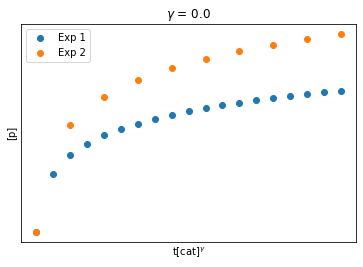

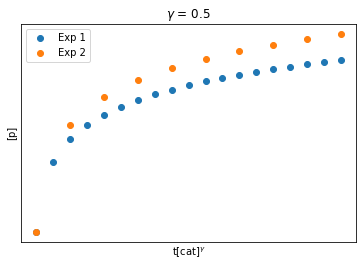

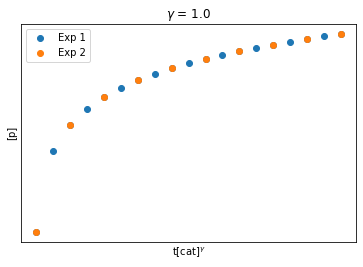

In [4]:
from graph_examples import ex_order_in_cat

ex_order_in_cat()

As can be seen above, an overlay of the two curves is observed when the catalyst concentration is raised to the power 1, meaning that the catalyst is **first order** in this reaction.

#### Reactant order determination

For reactants, this requires two experiments with the same starting conditions but a different excess in the reactant of the order being determined. This is a very similar process to the catalyst order determination.

In the example below, the order of **b** could be determined: 
- [**a**$_1$]$_0$ = [**a**$_2$]$_0$
- [**b**$_1$]$_0$ ≠ [**b**$_2$]$_0$
- [**cat**$_1$]$_0$ = [**cat**$_2$]$_0$
- [**p**$_1$]$_0$ = [**p**$_2$]$_0$

As above, [**a**$_1$]$_0$ = [**a**$_2$]$_0$ and [**p**$_1$]$_0$ = [**p**$_2$]$_0$ so either could be plotted on the y-axis. For the x-axis, another time normalisation is performed but with respect to **b** and this time it is a summation of each [**b**] data point raised to an arbitrary power ($\beta$) multiplied by the time step. Therefore to determine the order of **b**, a graph of **a** could be plotted against $\Sigma$[**b**]$^{\beta}$$\Delta$t, and $\beta$ will be varied until visual overlay is achieved (the same as for the above catalyst order determination).

## Suzuki-Miyaura Coupling Case Study

<div>
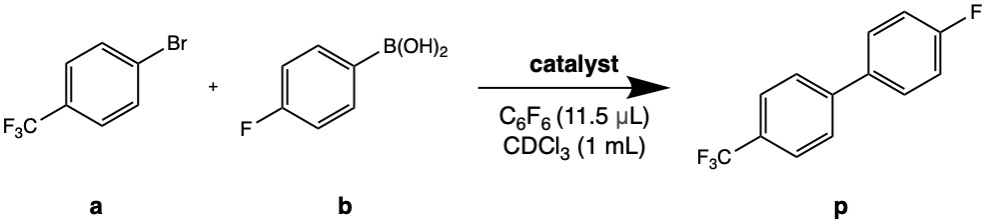
</div>

<div>
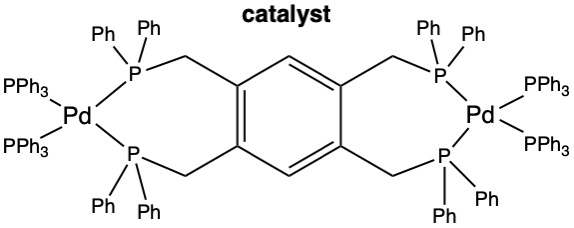
</div>

Four different experiments were monitored by $^{19}$F {$^1$H} NMR, with the integrals of **a**, **b** and **p** recorded every five seconds from the start to end of the coupling process. The molar concentrations of each were deduced from the NMR integrals (by comparison to the integral of the non-reactive hexafluorobenzene additive) and exported into csv files.

### Experimental Starting Conditions

The first step is to identify what information can be determined with this data set and which experiments need to be compared to retrieve this information. The starting conditions of the four experiments are shown in the table below.

<table>
  <thead>
    <tr>
      <th>Exp. number</th>  
      <th>[ArylBr]$_0$ / M</th>
      <th>[ArB(OH)$_2$]$_0$ / M</th>
      <th>[p]$_0$ / M</th>
      <th>[cat]$_0$ / M</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>1.0</td>
      <td>1.2</td>
      <td>0.0</td>
      <td>0.05</td>         
    </tr>
    <tr>
      <td>2</td>
      <td>0.8</td>
      <td>1.0</td>
      <td>0.0</td>  
      <td>0.05</td>         
    </tr>
    <tr>
      <td>3</td>
      <td>1.0</td>
      <td>1.2</td>
      <td>0.0</td> 
      <td>0.10</td>         
    </tr>
    <tr>
      <td>4</td>
      <td>0.8</td>
      <td>1.2</td>
      <td>0.0</td>  
      <td>0.05</td>         
    </tr>
  </tbody>
</table>

The following function uses Boolean logic to compare the starting concentrations of the four chemical species, listed in the table above, from two experiments. The useful information able to be obtained will be printed and then stored, with the corresponding experiment numbers, in a dictionary.

In [5]:
# empty dictionary to store the experiment numbers with the corresponding information to be extracted
inf_ext = {}

def diff_in_sc_determination(exp_no_a, exp_no_b):
    """
    Function to determine the differences in starting conditions between experiments, print which information, if any, that can be determined and then store the useful information within a dictionary.
    
    Args:
        exp_a (int): The number of the experiment to be analysed.
        exp_b (int): The number of the experiment to be analysed.
        
    Returns:
        (str): Useful information that can be determined from the two selected experiments.
    
    """
    # reading in experiment a
    exp_a = pd.read_csv(f'Exp{exp_no_a}.csv' , index_col = False, delimiter = ',')
    exp_a = exp_a.to_numpy()
    t1, aryl_bor1, prod1, aryl_br1, additive1, cat1 = exp_a.T
    # reading in experiment b
    exp_b = pd.read_csv(f'Exp{exp_no_b}.csv' , index_col = False, delimiter = ',')
    exp_b = exp_b.to_numpy()
    t2, aryl_bor2, prod2, aryl_br2, additive2, cat2 = exp_b.T

    # Boolean logic used to determine the differences in the starting conditions of the two experiments being compared and store this within the empty dictionary
    if (abs(aryl_bor1[0] - aryl_br1[0]) - abs(aryl_bor2[0] - aryl_br2[0])) == 0 and (cat1[0] == cat2[0]) and ((aryl_bor1[0] != aryl_bor2[0]) or (aryl_br1[0] != aryl_br2[0])):
        print('Same excess, different starting point - Catalyst degradation')
        inf_ext['Cat degrad'] = exp_no_a, exp_no_b        
    elif (abs(aryl_bor1[0] - aryl_br1[0]) - abs(aryl_bor2[0] - aryl_br2[0])) != 0 and (cat1[0] == cat2[0]) and (aryl_bor1[0] == aryl_bor2[0]):
        print('Same [cat], same [ArB(OH)2], different excess - Order in ArBr')
        inf_ext['ArBr order'] = exp_no_a, exp_no_b
    elif (abs(aryl_bor1[0] - aryl_br1[0]) - abs(aryl_bor2[0] - aryl_br2[0])) != 0 and (cat1[0] == cat2[0]) and (aryl_br1[0] == aryl_br2[0]):
        print('Same [cat], same [ArBr], different excess - Order in ArB(OH)2')           
        inf_ext['ArB(OH)2 order'] = exp_no_a, exp_no_b
    elif (aryl_bor1[0] == aryl_bor2[0]) and (aryl_br1[0] == aryl_br2[0]) and (cat1[0] != cat2[0]):
        print('Same starting conditions, different [cat] - Order in catalyst')     
        inf_ext['Cat order'] = exp_no_a, exp_no_b
    else:
        print('No information to be extracted')

# testing all possible combinations of experiments to identify which information can be extracted
for i in range(1, 5):
    for j in range(i + 1, 5):
        print(f'Exp {i} and Exp {j}')
        diff_in_sc_determination(i, j)
        print()

Exp 1 and Exp 2
Same excess, different starting point - Catalyst degradation

Exp 1 and Exp 3
Same starting conditions, different [cat] - Order in catalyst

Exp 1 and Exp 4
Same [cat], same [ArB(OH)2], different excess - Order in ArBr

Exp 2 and Exp 3
No information to be extracted

Exp 2 and Exp 4
Same [cat], same [ArBr], different excess - Order in ArB(OH)2

Exp 3 and Exp 4
No information to be extracted



From this data set it is possible to determine the order of both the ArBr and ArB(OH)$_2$ reagents, as well as the order of the catalyst used and whether catalyst degradation is occurring in the cycle. This is stored in the following dictionary:

In [6]:
print(inf_ext)

{'Cat degrad': (1, 2), 'Cat order': (1, 3), 'ArBr order': (1, 4), 'ArB(OH)2 order': (2, 4)}


### Probing Catalyst Degradation

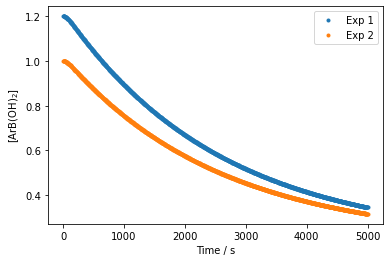

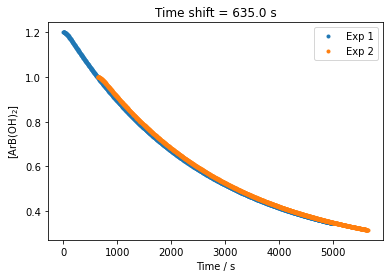

In [7]:
def cat_degrad(exp_no_a, exp_no_b):
    """
    Function to determine whether there is catalyst degradation occurring during the catalytic cycle.
    
    Args:
        exp_a (int): The number of the experiment to be analysed.
        exp_b (int): The number of the experiment to be analysed.
        
    Returns:
        (graphs): Two graphs of [a] vs time, one plot of the collected data for the two experiments and one with a time shift.
    """
    # reading in experiment a    
    exp_a = pd.read_csv(f'Exp{exp_no_a}.csv' , index_col = False, delimiter = ',')
    exp_a = exp_a.to_numpy()
    t1, aryl_bor1, prod1, aryl_br1, additive1, cat1 = exp_a.T
    # reading in experiment b
    exp_b = pd.read_csv(f'Exp{exp_no_b}.csv' , index_col = False, delimiter = ',')
    exp_b = exp_b.to_numpy()
    t2, aryl_bor2, prod2, aryl_br2, additive2, cat2 = exp_b.T

    # plotting the raw concentration data of the ArB(OH)2 vs t
    plt.plot(t1, aryl_bor1, 'o', label = f'Exp {exp_no_a}', markersize = 3)
    plt.plot(t2, aryl_bor2, 'o', label = f'Exp {exp_no_b}', markersize = 3)
    plt.xlabel('Time / s')
    plt.ylabel('[ArB(OH)$_2$]')
    plt.legend()
    plt.show()
    
    # determining the time shift needed
    values = [abs(conc - aryl_bor2[0])
             for i, conc
             in enumerate(aryl_bor1)]        
    
    i_cv = values.index(min(values)) # index of closest [ArB(OH)2] in exp 1 to exp 2 [ArB(OH)2]0
    
    # plotting the time shifted graph
    plt.plot(t1, aryl_bor1, 'o', label = f'Exp {exp_no_a}', markersize = 3)
    plt.plot(t2 + t1[i_cv], aryl_bor2, 'o', label = f'Exp {exp_no_b}', markersize = 3)
    plt.title(f'Time shift = {t1[i_cv]} s')
    plt.xlabel('Time / s')
    plt.ylabel('[ArB(OH)$_2$]')
    plt.legend()
    plt.show()
    
cat_degrad(inf_ext['Cat degrad'][0], inf_ext['Cat degrad'][1])

As can be seen in the graph above, after a time shift of 635.0 s, there is overlay of the two curves which is evidence that no catalyst degradation occurs within the number of catalytic cycles performed during these experiments.

### Order of Catalyst

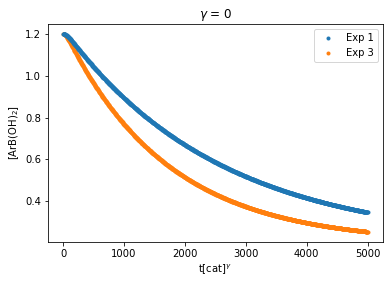

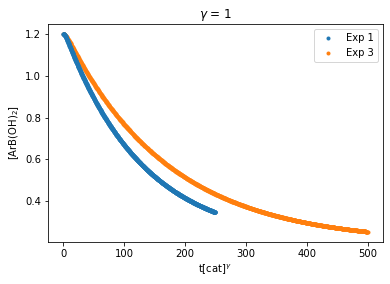

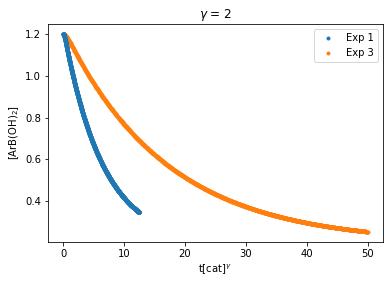

In [8]:
def cat_order(order, exp_no_a, exp_no_b):
    """
    Function to determine the order of the catalyst in this reaction.
    
    Args:
        order (int): The power that the catalyst concentration will be raised to in the plot.
        exp_a (int): The number of the experiment to be analysed.
        exp_b (int): The number of the experiment to be analysed.
        
    Returns:
        (graph): A graph of [a] vs t[cat]^gamma for the two experiments.  
    """
    # reading in experiment a
    exp_a = pd.read_csv(f'Exp{exp_no_a}.csv' , index_col = False, delimiter = ',')
    exp_a = exp_a.to_numpy()
    t1, aryl_bor1, prod1, aryl_br1, additive1, cat1 = exp_a.T
    # reading in experiment b
    exp_b = pd.read_csv(f'Exp{exp_no_b}.csv' , index_col = False, delimiter = ',')
    exp_b = exp_b.to_numpy()
    t2, aryl_bor2, prod2, aryl_br2, additive2, cat2 = exp_b.T
    
    # calculating and storing the values of the x-data to be plotted 
    x1 = t1 * (cat1[0] ** order)
    x2 = t2 * (cat2[0] ** order)
    
    # plotting the two curves
    plt.plot(x1, aryl_bor1, 'o', label = f'Exp {exp_no_a}', markersize = 3)
    plt.plot(x2, aryl_bor2, 'o', label = f'Exp {exp_no_b}', zorder = 1, markersize = 3)
    plt.title(f'$\gamma$ = {order}')
    plt.xlabel('t[cat]$^{\gamma}$')
    plt.ylabel('[ArB(OH)$_2$]')
    plt.legend()
    plt.show()

# testing the catalyst concentration raised to different powers
for i in range(3):
    cat_order(i, inf_ext['Cat order'][0], inf_ext['Cat order'][1])

From the graphs above, it can be deduced that the order of the catalyst is between 0 and 1.

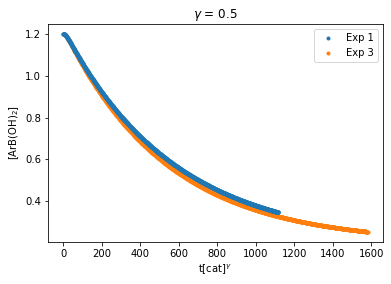

In [9]:
cat_order(0.5, inf_ext['Cat order'][0], inf_ext['Cat order'][1])

An order of 0.5 gives a better overlay of the two curves, but the fit could still be tighter. 

This was difficult to optimise because the [ArB(OH)$_2$]$_t$ values are not equal for Exp 1 and Exp 3 and the x-values vary significantly with changing $\gamma$. However, as the difference between the chosen $\gamma$ and the real order of the catalyst increases, for any given y-value ([ArB(OH)$_2$]) in Exp 1 and Exp 3, the difference between the corresponding x-values (t[cat]$^{\gamma}$) increases. This was used to minimize the difference between the two curves close to a specific y-value - a point chosen by the user.

In [10]:
def cat_order_optimisation(order, exp_no_a, exp_no_b, y_value):
    """
    A function to calculate the difference in x between the two curves at the closest y-data point to the chosen y-value ([ArB(OH)2]).
    
    Args:
        order (int): The power that the catalyst concentration will be raised to in the plot.
        exp_a (int): The number of the experiment to be analysed.
        exp_b (int): The number of the experiment to be analysed.
        y-value (float): The value of the y-data point ([ArB(OH)2]) for the difference to be calculated at.
        
    Returns:
        (float): A measure of the difference between the two curves i.e. the x values as a fraction, subtracted from 1. The closer the value to 0, the closer to the experimental order of the catalyst.   
    """
    # reading in experiment a
    exp_a = pd.read_csv(f'Exp{exp_no_a}.csv' , index_col = False, delimiter = ',')
    exp_a = exp_a.to_numpy()
    t1, aryl_bor1, prod1, aryl_br1, additive1, cat1 = exp_a.T
    # reading in experiment b
    exp_b = pd.read_csv(f'Exp{exp_no_b}.csv' , index_col = False, delimiter = ',')
    exp_b = exp_b.to_numpy()
    t2, aryl_bor2, prod2, aryl_br2, additive2, cat2 = exp_b.T
    
    # calculating and storing the values of the x- and y-data
    x1 = t1 * (cat1[0] ** order)
    x2 = t2 * (cat2[0] ** order)
    y1 = aryl_bor1
    y2 = aryl_bor2
    
    # list comprehension to store the absolute value of each [ArB(OH)2] data point subtracted from the chosen y-value
    v1 = [abs(conc1 - y_value)
          for conc1
          in y1]
    v2 = [abs(conc2 - y_value)
          for conc2
          in y2]

    # finding the index of the closest value (icv), i.e. [ArB(OH)2], to the chosen y-value
    icv_y1 = v1.index(min(v1))
    icv_y2 = v2.index(min(v2))
    # finding the x-value, i.e t[cat]^gamma, for the icv to the chosen y-value
    icv_x1 = x1[icv_y1]
    icv_x2 = x2[icv_y2]

    # determining how close the x-values are at the chosen gamma value
    return abs(1 - (icv_x1 / icv_x2))

As the overlay at $\gamma$ = 0.5 was close, 0.5 will be used as the initial guess when optimising the parameter (using the minimize function from the SciPy library). The optimised parameter will then be used in the plot.

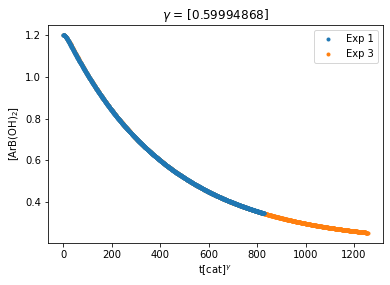

In [11]:
result = minimize(cat_order_optimisation, [0.5], args = (inf_ext['Cat order'][0], inf_ext['Cat order'][1], 0.5))
cat_order(result.x, inf_ext['Cat order'][0], inf_ext['Cat order'][1])

The fit of the curves is now tight and the optimised $\gamma$ value is ≈ 0.6. This order indicates that the reaction mechanism is complex and further mechanistic studies would need to be completed to understand the role of the Pd catalyst better.

### Order of ArBr

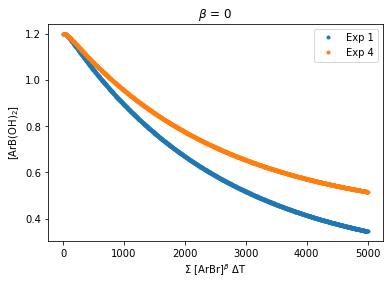

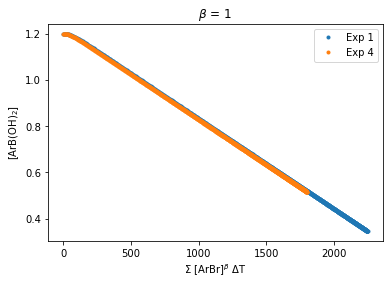

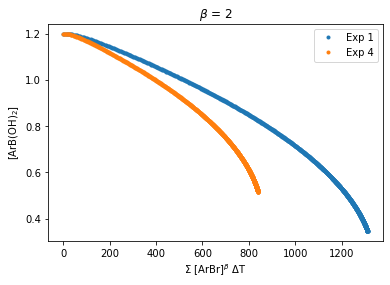

In [12]:
def aryl_br_order(order, exp_no_a, exp_no_b):
    """
    Function to determine the order of the aryl bromide reagent in this reaction.
    
    Args:
        order (int): The power that the aryl bromide concentration will be raised to in the plot.
        exp_a (int): The number of the experiment to be analysed.
        exp_b (int): The number of the experiment to be analysed.
        
    Returns:
        (graph): A graph of [ArB(OH)2] vs the sum of ([ArylBr]^beta) x (delta T) for the two experiments. 
    """
    # reading in experiment a
    exp_a = pd.read_csv(f'Exp{exp_no_a}.csv' , index_col = False, delimiter = ',')
    exp_a = exp_a.to_numpy()
    t1, aryl_bor1, prod1, aryl_br1, additive1, cat1 = exp_a.T
    # reading in experiment b
    exp_b = pd.read_csv(f'Exp{exp_no_b}.csv' , index_col = False, delimiter = ',')
    exp_b = exp_b.to_numpy()
    t2, aryl_bor2, prod2, aryl_br2, additive2, cat2 = exp_b.T

    # calculating delta T for each time step
    delta_T1 = []
    delta_T2 = []

    for i, time in enumerate(t1):
        if i == 0:
            delta_T1.append(0)
        if i > 0:
            delta_T1.append(t1[i] - t1[i - 1])

    for i, time in enumerate(t2):
        if i == 0:
            delta_T2.append(0)
        if i > 0:
            delta_T2.append(t2[i] - t2[i - 1])  

    # calculating the x-value of each data point and then summing each of the data points up to the current t        
    x1 = []
    x2 = []
    summed_x1 = []
    summed_x2 = []

    for i, conc in enumerate(aryl_br1):
        x1.append((conc ** order) * delta_T1[i])
        summed_x1.append(sum(x1))

    for i, conc in enumerate(aryl_br2):
        x2.append((conc ** order) * delta_T2[i])
        summed_x2.append(sum(x2))

    # plotting the graph
    plt.plot((summed_x1), aryl_bor1, 'o', label = f'Exp {exp_no_a}', markersize = 3)
    plt.plot((summed_x2), aryl_bor2, 'o', label = f'Exp {exp_no_b}', markersize = 3)
    plt.title(fr'$\beta$ = {order}')
    plt.xlabel(r'$\Sigma$ [ArBr]$^{\beta}$ $\Delta$T')
    plt.ylabel('[ArB(OH)$_2$]')
    plt.legend()
    plt.show()

# testing the ArBr concentration raised to different powers
for i in range(3):
    aryl_br_order(i, inf_ext['ArBr order'][0], inf_ext['ArBr order'][1])

The overlay of the curves indicates ArBr being first order in this reaction.

### Order of ArB(OH)$_2$

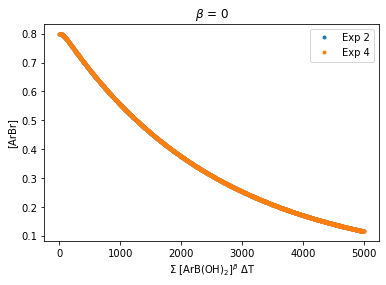

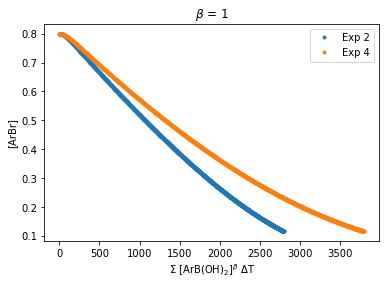

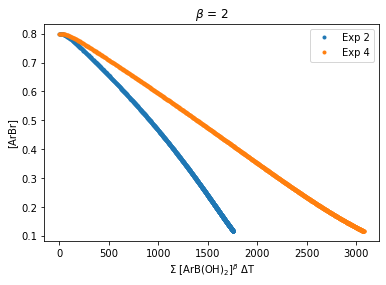

In [13]:
def aryl_bor_order(order, exp_no_a, exp_no_b):
    """
    Function to determine the order of the ArB(OH)2 reagent in this reaction.
    
    Args:
        order (int): The power that the ArB(OH)2 concentration will be raised to in the plot.
        exp_a (int): The number of the experiment to be analysed.
        exp_b (int): The number of the experiment to be analysed.
        
    Returns:
        (graph): A graph of [ArBr] vs sum of ([ArB(OH)2]^beta) x (delta T) for the two experiments. 
    """
    # reading in experiment a
    exp_a = pd.read_csv(f'Exp{exp_no_a}.csv' , index_col = False, delimiter = ',')
    exp_a = exp_a.to_numpy()
    t1, aryl_bor1, prod1, aryl_br1, additive1, cat1 = exp_a.T
    # reading in experiment b
    exp_b = pd.read_csv(f'Exp{exp_no_b}.csv' , index_col = False, delimiter = ',')
    exp_b = exp_b.to_numpy()
    t2, aryl_bor2, prod2, aryl_br2, additive2, cat2 = exp_b.T

    # calculating delta T for each time step
    delta_T1 = []
    delta_T2 = []

    for i, time in enumerate(t1):
        if i == 0:
            delta_T1.append(0)
        if i > 0:
            delta_T1.append(t1[i] - t1[i - 1])

    for i, time in enumerate(t2):
        if i == 0:
            delta_T2.append(0)
        if i > 0:
            delta_T2.append(t2[i] - t2[i - 1])  

    # calculating the x-value of each data point and then summing each of the data points up to the current t
    x1 = []
    x2 = []
    summed_x1 = []
    summed_x2 = []

    for i, conc in enumerate(aryl_bor1):
        x1.append((conc ** order) * delta_T1[i])
        summed_x1.append(sum(x1))

    for i, conc in enumerate(aryl_bor2):
        x2.append((conc ** order) * delta_T2[i])
        summed_x2.append(sum(x2))   
    
    # plotting the graph        
    plt.plot((summed_x1), aryl_br1, 'o', label = f'Exp {exp_no_a}', markersize = 3)
    plt.plot((summed_x2), aryl_br2, 'o', label = f'Exp {exp_no_b}', markersize = 3)
    plt.title(fr'$\beta$ = {order}')
    plt.xlabel(r'$\Sigma$ [ArB(OH)$_2$]$^{\beta}$ $\Delta$T')
    plt.ylabel('[ArBr]')
    plt.legend()
    plt.show()

# testing the ArylB(OH)2 concentration raised to different powers
for i in range(3):
    aryl_bor_order(i, inf_ext['ArB(OH)2 order'][0], inf_ext['ArB(OH)2 order'][1])

These graphs show that the reaction is 0 order with respect to ArB(OH)$_2$.

## Conclusions

Time normalisation in graphical kinetic analysis has successfully been used to extract important kinetic information from this Suzuki-Miyaura cross-coupling reaction. The reaction is:
- 1st order with respect to ArBr
- 0th order with respect to ArB(OH)$_2$
- ≈ 0.6 order with respect to the catalyst (no degradation in concentration range used)

Taking the catalytic cycle below as a proposed mechanism for the reaction, this suggests that the oxidative addition is the rate determining step as one equivalent of ArBr is used, but ArB(OH)$_2$ is not used until the transmetallation step. Again, the decimalised order of the catalyst suggests that the mechanism for this reaction is not straight forward to understand and further mechanistic work could be completed to probe this.

<div>
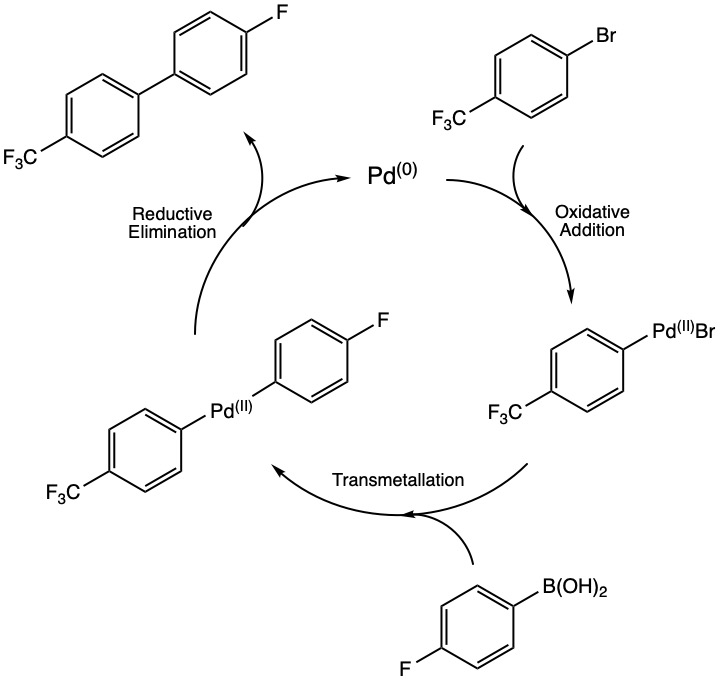
</div>

#### References
1 - C. H. Bartholomew, App. Cat. A: Gen., 2001, 212, 17-60